<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-07/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

#2. Berikut merupakan langkah-langkah yang dapat dilakukan:

  a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [28]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  output = np.zeros((output_height, output_width))

  for y in range(0, output_height):
    for x in range(0, output_width):
      output[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)

  return output

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [29]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

In [58]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

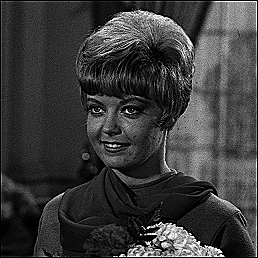

In [59]:
cv2_imshow(convolution2d(img_gray, kernel_sharpen,1,2))


#3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

## Image Sharpen


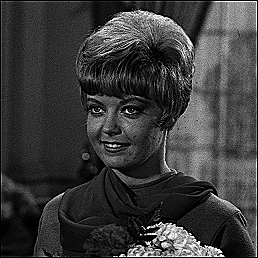

In [50]:

kernel_sharpen = np.array([[0,-1,0], [-1,5,-1],[0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))


## Emboss

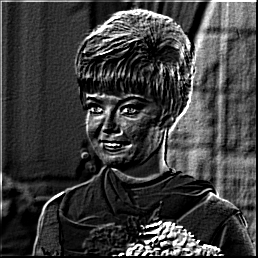

In [51]:

kernel_sharpen = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))


## Left Sobel Edge Detection

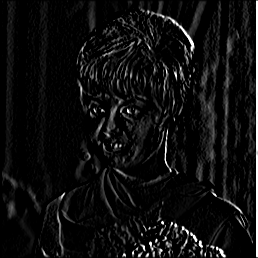

In [52]:

kernel_sharpen = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

## Canny Edge Detection

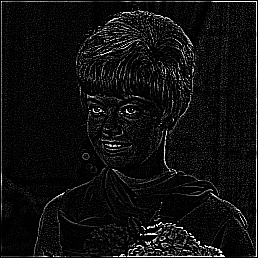

In [54]:
kernel_sharpen = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

## Prewitt Edge Detection

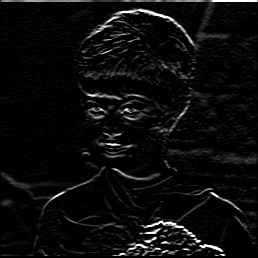

In [55]:
kernel_sharpen = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

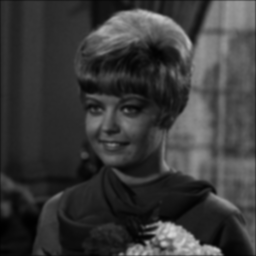

In [56]:

kernel_blur5 = np.array([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, kernel_blur5,1,2))


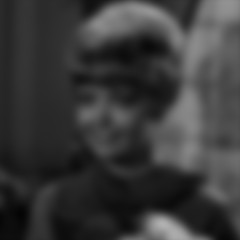

In [57]:

kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel,1,2))

# E. Tugas

In [14]:
import os

In [44]:

folder_path = '/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/KTP_More'

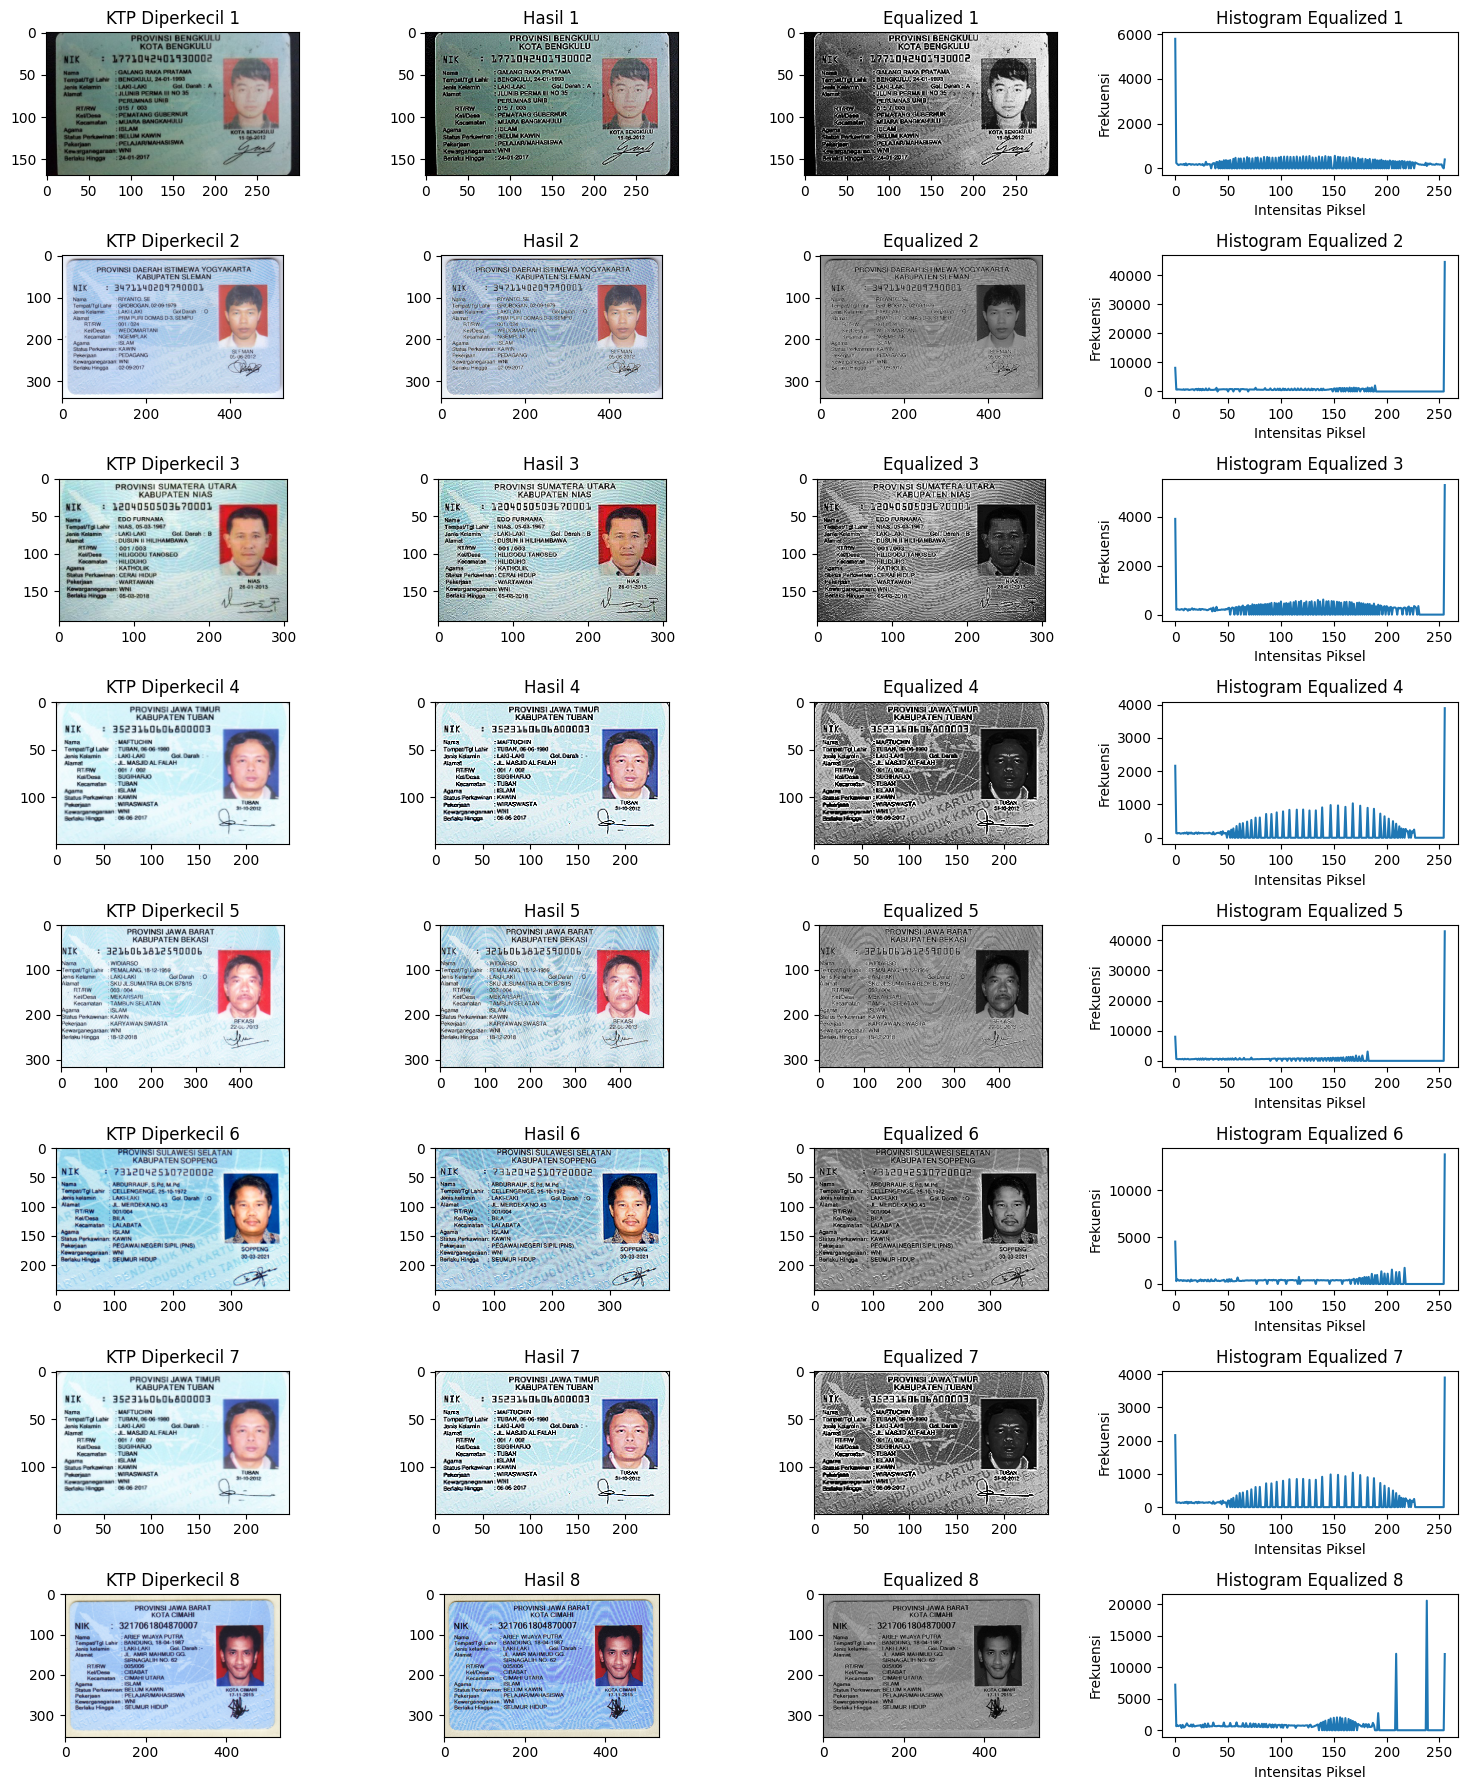

In [62]:
# Dapatkan daftar file citra dalam folder
ktp_filenames = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


# Fungsi untuk penyesuaian kecerahan
def adjust_brightness(image, value):
  """Menyesuaikan kecerahan gambar dengan nilai tertentu."""

  hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
  h, s, v = cv.split(hsv)
  v = cv.add(v, value)
  v = np.clip(v, 0, 255)
  hsv = cv.merge((h, s, v))
  return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Buat grid untuk menampilkan gambar
num_rows = len(ktp_filenames)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))


# Iterasi melalui gambar-gambar KTP
for i, ktp_filename in enumerate(ktp_filenames):
  path = os.path.join(folder_path, ktp_filename)
  ktp = cv.imread(path)

  # Ubah ukuran gambar KTP
  ktp_resized = cv.resize(ktp, (0, 0), fx=0.5, fy=0.5)

  # Terapkan penyesuaian Brightness
  ktp_brightness_adjusted = adjust_brightness(ktp_resized, -10)

  # Terapkan Sharpen
  result = cv.filter2D(ktp_brightness_adjusted, -1, kernel_sharpen)

  # Lakukan histogram equalization
  result_gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
  equalized = cv.equalizeHist(result_gray)
  equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

  # Tampilkan gambar asli dengan label
  axs[i, 0].imshow(cv.cvtColor(ktp_resized, cv.COLOR_BGR2RGB))
  axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

  # Tampilkan gambar yang telah diolah dengan label
  axs[i, 1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB,))
  axs[i, 1].set_title(f'Hasil {i+1}')

  # Tampilkan gambar hasil equalisasi dengan label
  axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
  axs[i, 2].set_title(f'Equalized {i+1}')

  # Hitung histogram gambar hasil equalisasi
  equalized_histogram = cv.calcHist([equalized], [0], None, [256], [0, 256])

  # Tampilkan histogram pada kolom ke-4 dengan label
  axs[i, 3].plot(equalized_histogram)
  axs[i, 3].set_title(f'Histogram Equalized {i+1}')
  axs[i, 3].set_xlabel('Intensitas Piksel')
  axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()